# Ecuacion de Poisson usando Método de Diferencias Finitas MEDF


In [ ]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


## Malla


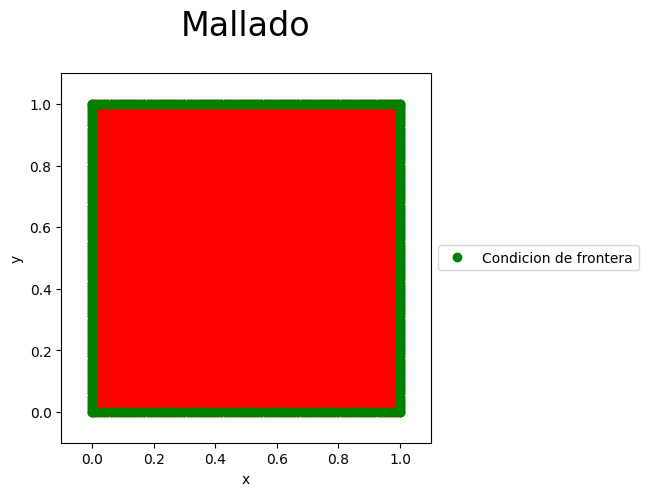

In [ ]:
N=100 # modify for better resolution
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot(x[1],y[1],'ro');
plt.plot(X,Y,'ro');
plt.plot(np.ones(N+1),y,'go',label='Condicion de frontera');
plt.plot(np.zeros(N+1),y,'go');
plt.plot(x,np.zeros(N+1),'go');
plt.plot(x, np.ones(N+1),'go');
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Mallado',fontsize=24,y=1.08)
plt.show();

## Condiciones de frontera


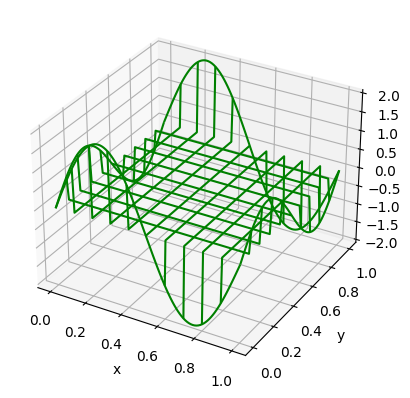

In [ ]:
w=np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=np.sin(2*np.pi*x[i]) #left Boundary
        w[i,N]=np.sin(2*np.pi*x[i]) #Right Boundary

for j in range (0,N):
        w[0,j]=2*np.sin(2*np.pi*y[j]) #Lower Boundary
        w[N,j]=2*np.sin(2*np.pi*y[j]) #Upper Boundary


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='g', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
# plt.title(r'Valores de frontera',fontsize=24,y=1.08)
plt.show()

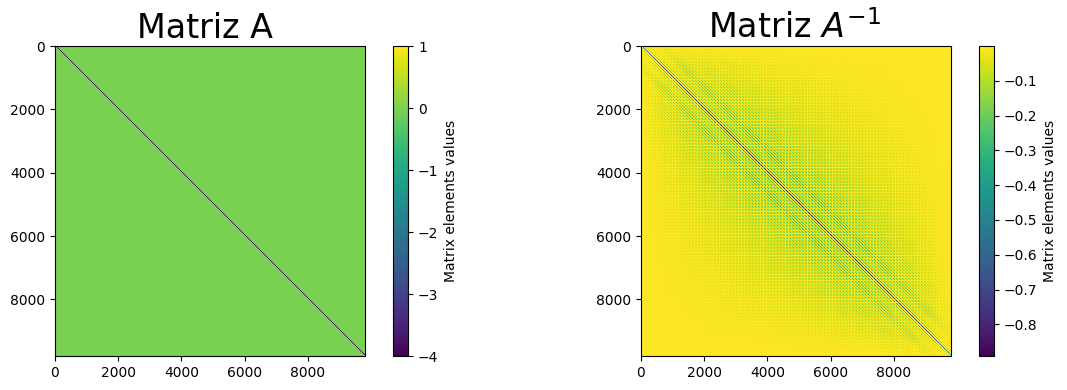

In [ ]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal
for i in range (0,N-1):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL
for i in range (1,N-1):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j-1]=1
# UPPPER DIAGONAL
for i in range (0,N-2):
    for j in range (0,N-1):
        A[i+(N-1)*j,i+(N-1)*j+1]=1

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1


# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matriz A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matriz $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();

In [ ]:
r=np.zeros(N2)

# vector r
for i in range (0,N-1):
    for j in range (0,N-1):
        r[i+(N-1)*j]=100*h*h*(x[i+1]*x[i+1]+y[j+1]*y[j+1])
# Boundary
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary

b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary

b=b_left_right+b_bottom_top

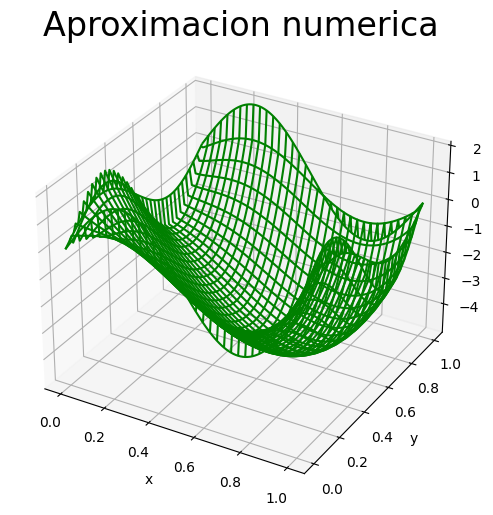

In [ ]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='g');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Aproximacion numerica',fontsize=24,y=1.08);
plt.show();

## Resultados

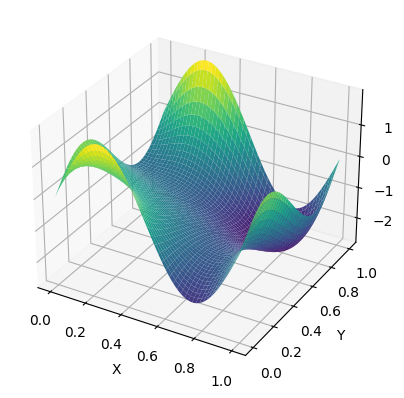

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos los parámetros y discretizamos el dominio
N = 100  # Número de puntos en cada dirección
L = 1.0  # Longitud del dominio en ambas direcciones
dx = dy = L / (N - 1)  # Espaciado en x e y

# Inicializamos el arreglo para la solución
u = np.zeros((N, N))

# Definimos las condiciones de contorno
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
u[:, 0] = np.sin(2 * np.pi * x)  # u(x,0) = sin(2*pi*x)
u[:, -1] = np.sin(2 * np.pi * x)  # u(x,1) = sin(2*pi*x)
u[0, :] = 2 * np.sin(2 * np.pi * y)  # u(0,y) = 2*sin(2*pi*y)
u[-1, :] = 2 * np.sin(2 * np.pi * y)  # u(1,y) = 2*sin(2*pi*y)

# Definimos la función fuente
x_values, y_values = np.meshgrid(x, y)
f = 100 * (x_values**2 + y_values**2)

# Iteramos para encontrar la solución usando el método de diferencias finitas
for _ in range(1000):
    u_new = np.copy(u)
    u_new[1:-1, 1:-1] = 0.25 * (u[0:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, 0:-2] + u[1:-1, 2:] - dx**2 * f[1:-1, 1:-1])
    u = np.copy(u_new)

# Graficamos la solución en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_values, y_values = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
ax.plot_surface(x_values, y_values, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u(x, y)')
plt.show()
